# Oscar Dominguez
# Date - 5/26
# Project 1 Revisited

Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models

For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.1. 

- Create a new notebook called "Project 1 - Revisited.ipynb" in your project repo.
    - You may either make a copy of your prior notebook that you will modify, 
or you can start a new blank notebook and copy over the code from your old notebook (as needed).

- Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

**LinearRegression**
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
- Select the top 3 most impactful features and interpret their coefficients in plain English.
- Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

**Tree-Based Model**
- Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
- Extract and visualize the feature importances that your model determined.
- Identify the top 5 most important features.
- Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

## Data dictionary -

<img src='Data/data_dictionary.png' width="500" height="600">


In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}


In [2]:
path = 'Data/sales_predictions_2023.csv'

df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Checking for Duplicates
df.duplicated().sum()

0

In [5]:
# Checking missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# -Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
# -Perform a train test split
y = df['Item_Outlet_Sales'].copy() 
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year']).copy() 
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2


In [7]:
df['Outlet_Size'].value_counts()
# Ordinal Encoding 'Outlet_Size'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [8]:
#Ordinal encoding Item_Fat_Content
df['Item_Fat_Content'].replace({'low fat':0,'LF':0,'Low Fat':0,'reg':1,'Regular':1},inplace=True)

In [9]:
# -Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
# -Create a preprocessing object to prepare the dataset for Machine Learning
# -Make sure your imputation of missing values occurs after the train test split using SimpleImputer.
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5285 non-null   float64
 1   Item_Fat_Content      6392 non-null   object 
 2   Item_Visibility       6392 non-null   float64
 3   Item_Type             6392 non-null   object 
 4   Item_MRP              6392 non-null   float64
 5   Outlet_Size           4580 non-null   object 
 6   Outlet_Location_Type  6392 non-null   object 
 7   Outlet_Type           6392 non-null   object 
dtypes: float64(3), object(5)
memory usage: 449.4+ KB


None

In [11]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,NaN,Tier 2,Supermarket Type1
860,low fat,Snack Foods,NaN,Tier 2,Supermarket Type1


In [12]:
# Imputers
freq_imputer = SimpleImputer(strategy='constant',fill_value='MISSING')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [13]:
# Cat and Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, verbose_feature_names_out=False)

# fit on train
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13c943910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13c9433d0>)],
                  verbose_feature_names_out=False)

In [14]:
## fit column transformer and run get_feature_names_out
feature_names = preprocessor.get_feature_names_out()
feature_names


array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [15]:
# Converting X_train to dataframe
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Converting X_test to dataframe
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.331009,-0.776646,-0.998816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892,0.100317,-1.585194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.378447,-0.482994,-1.595784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
from sklearn import metrics
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

# Linear Regression
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
    - Select the top 3 most impactful features and interpret their coefficients in plain English.

In [18]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1139.69
Test Data:	R^2= 0.57	RMSE= 1094.54


In [19]:
# Getting coefficients
lin_reg.coef_

array([-8.08231426e+00, -1.82940632e+01,  9.84216274e+02, -4.15885909e+14,
       -4.15885909e+14, -4.15885909e+14, -4.15885909e+14, -4.15885909e+14,
        7.75988398e+14,  7.75988398e+14,  7.75988398e+14,  7.75988398e+14,
        7.75988398e+14,  7.75988398e+14,  7.75988398e+14,  7.75988398e+14,
        7.75988398e+14,  7.75988398e+14,  7.75988398e+14,  7.75988398e+14,
        7.75988398e+14,  7.75988398e+14,  7.75988398e+14,  7.75988398e+14,
       -7.16210209e+15, -7.16210209e+15, -7.16210209e+15, -7.16210209e+15,
       -4.66932926e+16, -4.66932926e+16, -4.66932926e+16, -2.70275687e+16,
       -2.70275687e+16, -2.70275687e+16, -2.70275687e+16])

In [20]:
## Checking the number of coeffs matches the # of feature names
feature_names = X_train_df.columns

print(len(lin_reg.coef_))
len(feature_names)

35


35

In [21]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs


In [22]:
## Saving the coefficients
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Location_Type_Tier 1       -4.669329e+16
Outlet_Location_Type_Tier 3       -4.669329e+16
Outlet_Location_Type_Tier 2       -4.669329e+16
Outlet_Type_Grocery Store         -2.702757e+16
Outlet_Type_Supermarket Type2     -2.702757e+16
Outlet_Type_Supermarket Type1     -2.702757e+16
Outlet_Type_Supermarket Type3     -2.702757e+16
Outlet_Size_MISSING               -7.162102e+15
Outlet_Size_High                  -7.162102e+15
Outlet_Size_Small                 -7.162102e+15
Outlet_Size_Medium                -7.162102e+15
Item_Fat_Content_LF               -4.158859e+14
Item_Fat_Content_Low Fat          -4.158859e+14
Item_Fat_Content_reg              -4.158859e+14
Item_Fat_Content_low fat          -4.158859e+14
Item_Fat_Content_Regular          -4.158859e+14
Item_Visibility                   -1.829406e+01
Item_Weight                       -8.082314e+00
Item_MRP                           9.842163e+02
Item_Type_Dairy                    7.759884e+14
Item_Type_Soft Drinks              7.759

In [23]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Outlet_Location_Type_Tier 1       -4.669329e+16
Outlet_Location_Type_Tier 3       -4.669329e+16
Outlet_Location_Type_Tier 2       -4.669329e+16
Outlet_Type_Grocery Store         -2.702757e+16
Outlet_Type_Supermarket Type2     -2.702757e+16
Outlet_Type_Supermarket Type1     -2.702757e+16
Outlet_Type_Supermarket Type3     -2.702757e+16
Outlet_Size_MISSING               -7.162102e+15
Outlet_Size_High                  -7.162102e+15
Outlet_Size_Small                 -7.162102e+15
Outlet_Size_Medium                -7.162102e+15
Item_Fat_Content_LF               -4.158859e+14
Item_Fat_Content_Low Fat          -4.158859e+14
Item_Fat_Content_reg              -4.158859e+14
Item_Fat_Content_low fat          -4.158859e+14
Item_Fat_Content_Regular          -4.158859e+14
Item_Visibility                   -1.829406e+01
Item_Weight                       -8.082314e+00
Item_MRP                           9.842163e+02
Item_Type_Dairy                    7.759884e+14
Item_Type_Soft Drinks              7.759

In [24]:
# Removing scientific notation
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Outlet_Location_Type_Tier 1       -46,693,292,555,859,736.00
Outlet_Location_Type_Tier 3       -46,693,292,555,859,624.00
Outlet_Location_Type_Tier 2       -46,693,292,555,859,568.00
Outlet_Type_Grocery Store         -27,027,568,708,390,144.00
Outlet_Type_Supermarket Type2     -27,027,568,708,388,696.00
Outlet_Type_Supermarket Type1     -27,027,568,708,388,264.00
Outlet_Type_Supermarket Type3     -27,027,568,708,386,964.00
Outlet_Size_MISSING                -7,162,102,093,172,401.00
Outlet_Size_High                   -7,162,102,093,172,295.00
Outlet_Size_Small                  -7,162,102,093,172,261.00
Outlet_Size_Medium                 -7,162,102,093,172,182.00
Item_Fat_Content_LF                  -415,885,908,985,510.94
Item_Fat_Content_Low Fat             -415,885,908,985,440.75
Item_Fat_Content_reg                 -415,885,908,985,440.25
Item_Fat_Content_low fat             -415,885,908,985,391.75
Item_Fat_Content_Regular             -415,885,908,985,370.62
Item_Visibility         

In [25]:
df.select_dtypes('object').nunique()


Item_Identifier         1559
Item_Type                 16
Outlet_Identifier         10
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

## Re-fitting Linear Regression

In [26]:
# -Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
# -Perform a train test split
y = df['Item_Outlet_Sales'].copy() 
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year']).copy() 

X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.02,Dairy,249.81,1.00,Tier 1,Supermarket Type1
1,5.92,1,0.02,Soft Drinks,48.27,1.00,Tier 3,Supermarket Type2
2,17.50,0,0.02,Meat,141.62,1.00,Tier 1,Supermarket Type1
3,19.20,1,0.00,Fruits and Vegetables,182.09,NaN,Tier 3,Grocery Store
4,8.93,0,0.00,Household,53.86,2.00,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,6.87,0,0.06,Snack Foods,214.52,2.00,Tier 3,Supermarket Type1
8519,8.38,1,0.05,Baking Goods,108.16,NaN,Tier 2,Supermarket Type1
8520,10.60,0,0.04,Health and Hygiene,85.12,0.00,Tier 2,Supermarket Type1
8521,7.21,1,0.15,Snack Foods,103.13,1.00,Tier 3,Supermarket Type2


In [27]:
# Get counts
df['Outlet_Size'].value_counts()

# Ordinal Encoding 'Outlet_Size'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].value_counts()

1.00    2793
0.00    2388
2.00     932
Name: Outlet_Size, dtype: int64

In [28]:
#Ordinal encoding Item_Fat_Content
df['Item_Fat_Content'].replace({'low fat':0,'LF':0,'Low Fat':0,'reg':1,'Regular':1},inplace=True)

In [29]:
# -Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [30]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]

In [31]:
# Imputers
freq_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(drop='if_binary', sparse=False)


In [32]:
# Cat and Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, verbose_feature_names_out=False)

# fit on train
preprocessor.fit(X_train)

## fit column transformer and run get_feature_names_out
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)

X_test_df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.33,-0.74,-0.78,-1.00,2.11,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
2957,-1.18,-0.74,0.10,-1.59,-1.29,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
7031,0.38,1.35,-0.48,-1.60,0.41,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


## Re-fitting Linear Regression 

In [33]:
# fitting a linear regression model and getting scores
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.56	RMSE= 1140.39
Test Data:	R^2= 0.57	RMSE= 1094.59


In [34]:
# Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                                         -7.38
Item_Fat_Content                                    30.20
Item_Visibility                                    -21.67
Item_MRP                                           984.40
Outlet_Size                                          1.24
Item_Type_Baking Goods                -479,974,397,694.74
Item_Type_Breads                      -479,974,397,724.92
Item_Type_Breakfast                   -479,974,397,648.37
Item_Type_Canned                      -479,974,397,668.99
Item_Type_Dairy                       -479,974,397,801.04
Item_Type_Frozen Foods                -479,974,397,697.26
Item_Type_Fruits and Vegetables       -479,974,397,651.65
Item_Type_Hard Drinks                 -479,974,397,685.31
Item_Type_Health and Hygiene          -479,974,397,668.56
Item_Type_Household                   -479,974,397,691.78
Item_Type_Meat                        -479,974,397,704.62
Item_Type_Others                      -479,974,397,726.73
Item_Type_Seaf

In [35]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [36]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

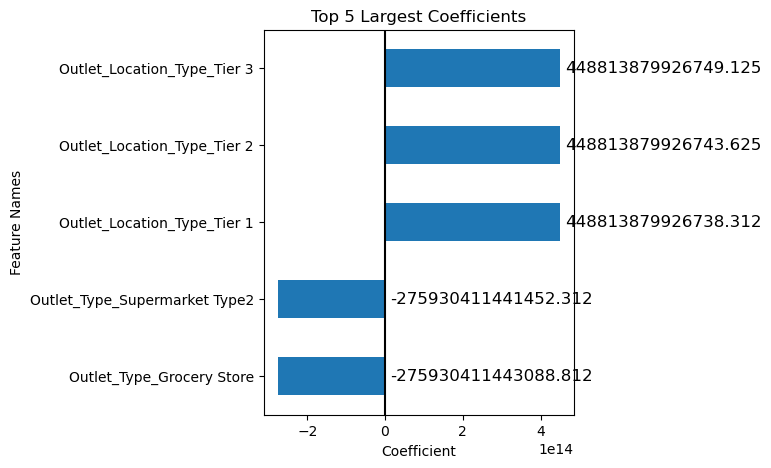

In [37]:
# Plotting coefficients
plot_coeffs(coeffs, top_n=5, annotate=True);

# Select the top 3 most impactful features and interpret their coefficients in plain English.
- Outlet_Location_Type_Tier 3
- Outlet_Location_Type_Tier 2
- Outlet_Location_Type_Tier 1

In summary, each Outlet_Location_Type from Type 1 to Type 3 basically tells us that the most impactful features are based on location of the outlet stores.


# Tree-Based Model - Random Forrest



In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_df,y_train)
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 431.49
Test Data:	R^2= 0.55	RMSE= 1115.76


In [39]:
# Getting feature importance
rf_reg.feature_importances_

array([0.05268901, 0.00850767, 0.1061897 , 0.44951524, 0.01873684,
       0.00426131, 0.00243845, 0.00264049, 0.00436146, 0.00604823,
       0.00570496, 0.00803558, 0.00300951, 0.00397931, 0.006548  ,
       0.00352111, 0.0015531 , 0.00168006, 0.00835148, 0.00538201,
       0.00337654, 0.00705452, 0.0066731 , 0.00395546, 0.19172982,
       0.00324803, 0.00314619, 0.07766281])

In [40]:
## Checking the number of feature importances matches the # of columns
print(len(rf_reg.feature_importances_))
print(len(X_train_df.columns))
len(rf_reg.feature_importances_) == len(X_train_df.columns)

28
28


True

In [41]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances


In [42]:
importances = get_importances(rf_reg,sort=True,ascending=False)
importances


Item_MRP                          0.45
Outlet_Type_Grocery Store         0.19
Item_Visibility                   0.11
Outlet_Type_Supermarket Type3     0.08
Item_Weight                       0.05
Outlet_Size                       0.02
Item_Fat_Content                  0.01
Item_Type_Snack Foods             0.01
Item_Type_Fruits and Vegetables   0.01
Outlet_Location_Type_Tier 1       0.01
Outlet_Location_Type_Tier 2       0.01
Item_Type_Household               0.01
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Soft Drinks             0.01
Item_Type_Canned                  0.00
Item_Type_Baking Goods            0.00
Item_Type_Health and Hygiene      0.00
Outlet_Location_Type_Tier 3       0.00
Item_Type_Meat                    0.00
Item_Type_Starchy Foods           0.00
Outlet_Type_Supermarket Type1     0.00
Outlet_Type_Supermarket Type2     0.00
Item_Type_Hard Drinks             0.00
Item_Type_Breakfast               0.00
Item_Type_Breads         

In [43]:
importances.sum()

0.9999999999999999

In [44]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax


In [45]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

<AxesSubplot: title={'center': 'Top 5 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

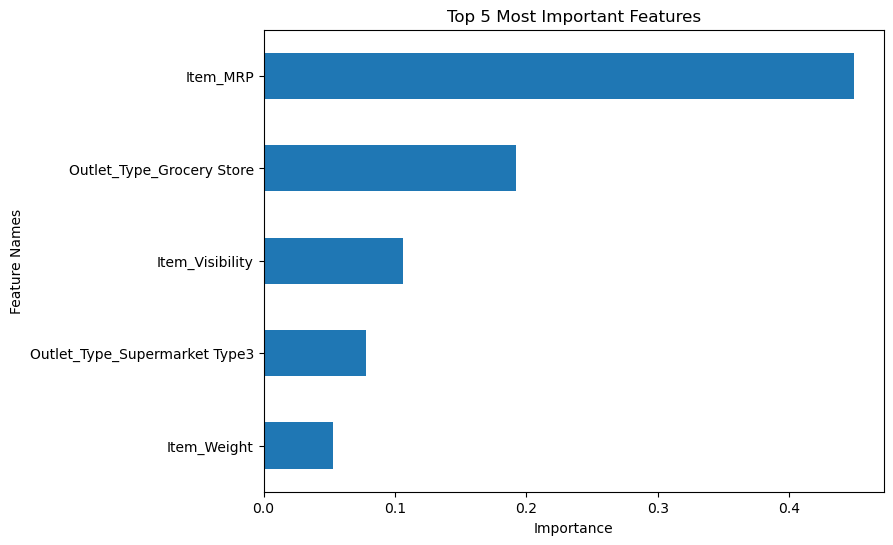

In [46]:
## testing our function
plot_importance(importances,top_n = 5)

# Joblib
## Saving

In [47]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
          "LinearRegression": lin_reg,
         'preprocessor':preprocessor,
         'RandomForest':rf_reg}
joblib.dump(export, 'Data/random_forest_l01.joblib')

['Data/random_forest_l01.joblib']

## Loading

In [48]:
loaded = joblib.load('Data/random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'preprocessor', 'RandomForest'])

In [49]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

Training Data:	R^2= 0.94	RMSE= 431.49
Test Data:	R^2= 0.55	RMSE= 1115.76


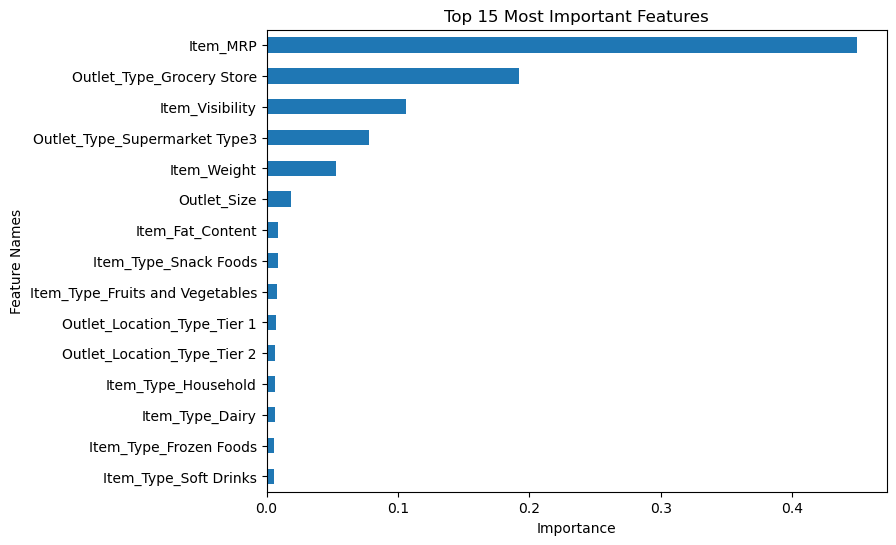

In [50]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);
